# Importación de librerías

In [1]:
import numpy as np
import cv2
import os
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from skimage import img_as_ubyte
import matplotlib.pyplot as plt

# Procesamiento de imagenes awake (Duración: ~5 minutos)

In [11]:
# Rutas de imágenes
ruta = "../images/awake/"
ruta_procesadas_awake = os.path.join(ruta, "../../processed_images/awake")
os.makedirs(ruta_procesadas_awake, exist_ok=True)

for nombre in sorted(os.listdir(ruta)):
    ruta_img = os.path.join(ruta, nombre)
    # Saltamos si no es archivo de imagen (.jpg, .png, etc.)
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    img = cv2.imread(ruta_img)
    gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # --- Paso faltante: Umbralización para obtener binaria ---
    binaria = cv2.adaptiveThreshold(gris, 127, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Operaciones morfológicas
    kernel = np.ones((3, 3), np.uint8)
    binaria = cv2.morphologyEx(binaria, cv2.MORPH_OPEN, kernel, iterations=1)
    binaria = cv2.morphologyEx(binaria, cv2.MORPH_CLOSE, kernel, iterations=1)
    binaria = cv2.resize(binaria, (1024, 1024))
    
    # Guardar imagen procesada
    ruta_destino = os.path.join(ruta_procesadas_awake, nombre)
    cv2.imwrite(ruta_destino, binaria)


# Procesamiento de imagenes sleepy (Duración: ~5 minutos)

In [10]:
# Rutas de imágenes
ruta = "../images/sleepy/"
ruta_procesadas_sleepy = os.path.join(ruta, "../../processed_images/sleepy")
os.makedirs(ruta_procesadas_sleepy, exist_ok=True)

for nombre in sorted(os.listdir(ruta)):
    ruta_img = os.path.join(ruta, nombre)
    # Saltamos si no es archivo de imagen (.jpg, .png, etc.)
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    img = cv2.imread(ruta_img)
    gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # --- Paso faltante: Umbralización para obtener binaria ---
    binaria = cv2.adaptiveThreshold(gris, 127, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Operaciones morfológicas
    kernel = np.ones((3, 3), np.uint8)
    binaria = cv2.morphologyEx(binaria, cv2.MORPH_OPEN, kernel, iterations=1)
    binaria = cv2.morphologyEx(binaria, cv2.MORPH_CLOSE, kernel, iterations=1)
    binaria = cv2.resize(binaria, (1024, 1024))
    
    # Guardar imagen procesada
    ruta_destino = os.path.join(ruta_procesadas_sleepy, nombre)
    cv2.imwrite(ruta_destino, binaria)

# Extraer estadisticas basicas para awake y sleepy (Duración: ~22 minutos)

In [12]:
ruta = "../images/awake/"
ruta_procesadas_sleepy = os.path.join(ruta, "../../processed_images/sleepy")
ruta_procesadas_awake = os.path.join(ruta, "../../processed_images/awake")
resultados = []

for nombre in sorted(os.listdir(ruta_procesadas_awake)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas_awake, nombre)
    image = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    mean = np.mean(image)
    variance = np.var(image)
    std_dev = np.std(image)
    image_float = np.float32(image) + 1e-5
    entropy = -np.sum(image_float * np.log(image_float))

    resultados.append({
        'image': nombre,
        'mean': mean,
        'variance': variance,
        'std_dev': std_dev,
        'entropy': entropy
    })

# Guardar en hoja de Excel (crea el archivo si no existe, sino sobrescribe la hoja)
excel_path = "../results/stats.xlsx"
df = pd.DataFrame(resultados)
with pd.ExcelWriter(excel_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="basics_stats_awake", index=False)

print("Estadísticas básicas guardadas en la hoja 'basics_stats_awake' de 'stats.xlsx'")


resultados2 = []

for nombre in sorted(os.listdir(ruta_procesadas_sleepy)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas_sleepy, nombre)
    image = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    mean = np.mean(image)
    variance = np.var(image)
    std_dev = np.std(image)
    image_float = np.float32(image) + 1e-5
    entropy = -np.sum(image_float * np.log(image_float))

    resultados2.append({
        'image': nombre,
        'mean': mean,
        'variance': variance,
        'std_dev': std_dev,
        'entropy': entropy
    })

# Guardar en hoja de Excel (crea el archivo si no existe, sino sobrescribe la hoja)
excel_path = "../results/stats.xlsx"
df = pd.DataFrame(resultados2)
with pd.ExcelWriter(excel_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="basics_stats_sleepy", index=False)

print("Estadísticas básicas guardadas en la hoja 'basics_stats_sleepy' de 'stats.xlsx'")

Estadísticas básicas guardadas en la hoja 'basics_stats_awake' de 'stats.xlsx'
Estadísticas básicas guardadas en la hoja 'basics_stats_sleepy' de 'stats.xlsx'


# Estadisticas de segundo orden para awake y sleepy (Duración: ~5 minutos)

In [13]:
ruta = "../images/awake/"
ruta_procesadas_sleepy = os.path.join(ruta, "../../processed_images/sleepy")
ruta_procesadas_awake = os.path.join(ruta, "../../processed_images/awake")

# Awake

resultados = []

for nombre in sorted(os.listdir(ruta_procesadas_awake)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue
    
    ruta_img = os.path.join(ruta_procesadas_awake, nombre)
    image = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    # Convertir a ubyte
    image = img_as_ubyte(image)

    # Calcular GLCM (1 pixel distancia, ángulo 0)
    glcm = graycomatrix(image, distances=[1], angles=[0], symmetric=True, normed=True)

    # Extraer propiedades
    contrast = graycoprops(glcm, prop='contrast')[0, 0]
    homogeneity = graycoprops(glcm, prop='homogeneity')[0, 0]
    dissimilarity = graycoprops(glcm, prop='dissimilarity')[0, 0]
    energy = graycoprops(glcm, prop='energy')[0, 0]
    correlation = graycoprops(glcm, prop='correlation')[0, 0]
    mean_glcm = np.mean(glcm)
    std_dev_glcm = np.std(glcm)
    glcm_flat = glcm.flatten()
    glcm_flat = glcm_flat[glcm_flat > 0]
    entropy_glcm = -np.sum(glcm_flat * np.log(glcm_flat))

    resultados.append({
        'image': nombre,
        'contrast': contrast,
        'homogeneity': homogeneity,
        'dissimilarity': dissimilarity,
        'energy': energy,
        'correlation': correlation,
        'mean_glcm': mean_glcm,
        'std_dev_glcm': std_dev_glcm,
        'entropy_glcm': entropy_glcm
    })

# Crear DataFrame
df_glcm = pd.DataFrame(resultados)

# Escribir en hoja nueva de Excel
excel_path = "../results/stats.xlsx"  # Usar siempre el mismo archivo
with pd.ExcelWriter(excel_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df_glcm.to_excel(writer, sheet_name="GLCM_awake", index=False)

print(f"Características GLCM guardadas en la hoja 'GLCM_awake' de '{excel_path}'")

# Sleepy

resultados2 = []

for nombre in sorted(os.listdir(ruta_procesadas_sleepy)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue
    
    ruta_img = os.path.join(ruta_procesadas_sleepy, nombre)
    image = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    # Convertir a ubyte
    image = img_as_ubyte(image)

    # Calcular GLCM (1 pixel distancia, ángulo 0)
    glcm = graycomatrix(image, distances=[1], angles=[0], symmetric=True, normed=True)

    # Extraer propiedades
    contrast = graycoprops(glcm, prop='contrast')[0, 0]
    homogeneity = graycoprops(glcm, prop='homogeneity')[0, 0]
    dissimilarity = graycoprops(glcm, prop='dissimilarity')[0, 0]
    energy = graycoprops(glcm, prop='energy')[0, 0]
    correlation = graycoprops(glcm, prop='correlation')[0, 0]
    mean_glcm = np.mean(glcm)
    std_dev_glcm = np.std(glcm)
    glcm_flat = glcm.flatten()
    glcm_flat = glcm_flat[glcm_flat > 0]
    entropy_glcm = -np.sum(glcm_flat * np.log(glcm_flat))

    resultados2.append({
        'image': nombre,
        'contrast': contrast,
        'homogeneity': homogeneity,
        'dissimilarity': dissimilarity,
        'energy': energy,
        'correlation': correlation,
        'mean_glcm': mean_glcm,
        'std_dev_glcm': std_dev_glcm,
        'entropy_glcm': entropy_glcm
    })

# Crear DataFrame
df_glcm = pd.DataFrame(resultados2)

# Escribir en hoja nueva de Excel
excel_path = "../results/stats.xlsx"  # Usar siempre el mismo archivo
with pd.ExcelWriter(excel_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df_glcm.to_excel(writer, sheet_name="GLCM_sleepy", index=False)

print(f"Características GLCM guardadas en la hoja 'GLCM_sleepy' de '{excel_path}'")

Características GLCM guardadas en la hoja 'GLCM_awake' de '../results/stats.xlsx'
Características GLCM guardadas en la hoja 'GLCM_sleepy' de '../results/stats.xlsx'


# Extraer momentos HU para awake y sleepy (Duración: ~7 minutos)

In [2]:
ruta = "../images/awake/"
ruta_procesadas_sleepy = os.path.join(ruta, "../../processed_images/sleepy")
ruta_procesadas_awake = os.path.join(ruta, "../../processed_images/awake")

# Awake
hu_data = []

for nombre in sorted(os.listdir(ruta_procesadas_awake)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas_awake, nombre)
    image = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    edges = cv2.Canny(image, 100, 200)
    moments = cv2.moments(edges)
    hu_moments_1 = cv2.HuMoments(moments).flatten()

    # Agrega fila de datos para Excel
    hu_data.append({
        'image': nombre,
        'hu1': hu_moments_1[0],
        'hu2': hu_moments_1[1],
        'hu3': hu_moments_1[2],
        'hu4': hu_moments_1[3],
        'hu5': hu_moments_1[4],
        'hu6': hu_moments_1[5],
        'hu7': hu_moments_1[6],
    })

# Guarda todo en hoja "hu_moments_awake"
excel_path = "../results/stats.xlsx"
df = pd.DataFrame(hu_data)
with pd.ExcelWriter(excel_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="hu_moments_awake", index=False)

print("Momentos de Hu guardados en la hoja 'hu_moments_awake' de 'stats.xlsx'")

#-------------------------------------------------------------------------------

# Sleepy

hu_data2 = []

for nombre in sorted(os.listdir(ruta_procesadas_sleepy)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas_sleepy, nombre)
    image = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    edges = cv2.Canny(image, 100, 200)
    moments = cv2.moments(edges)
    hu_moments_1 = cv2.HuMoments(moments).flatten()

    # Agrega fila de datos para Excel
    hu_data2.append({
        'image': nombre,
        'hu1': hu_moments_1[0],
        'hu2': hu_moments_1[1],
        'hu3': hu_moments_1[2],
        'hu4': hu_moments_1[3],
        'hu5': hu_moments_1[4],
        'hu6': hu_moments_1[5],
        'hu7': hu_moments_1[6],
    })

# Guarda todo en hoja "hu_moments_sleepy"
excel_path = "../results/stats.xlsx"
df = pd.DataFrame(hu_data2)
with pd.ExcelWriter(excel_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="hu_moments_sleepy", index=False)

print("Momentos de Hu guardados en la hoja 'hu_moments_sleepy' de 'stats.xlsx'")

Momentos de Hu guardados en la hoja 'hu_moments_awake' de 'stats.xlsx'
Momentos de Hu guardados en la hoja 'hu_moments_sleepy' de 'stats.xlsx'


# Transformada de Hough para awake y sleepy

## Lineas (Duración: ~10 minutos)

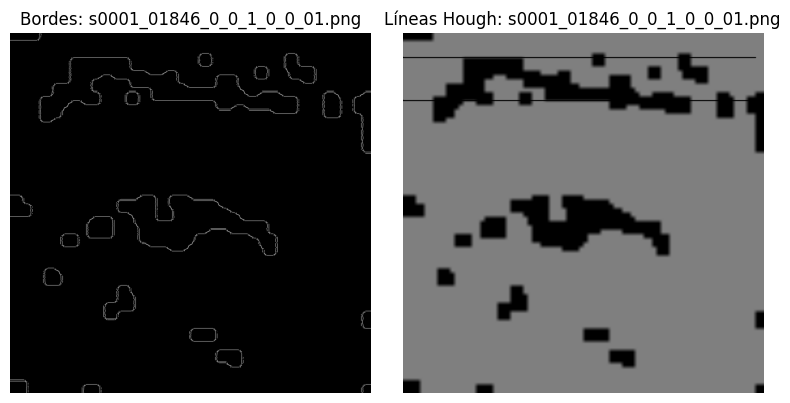

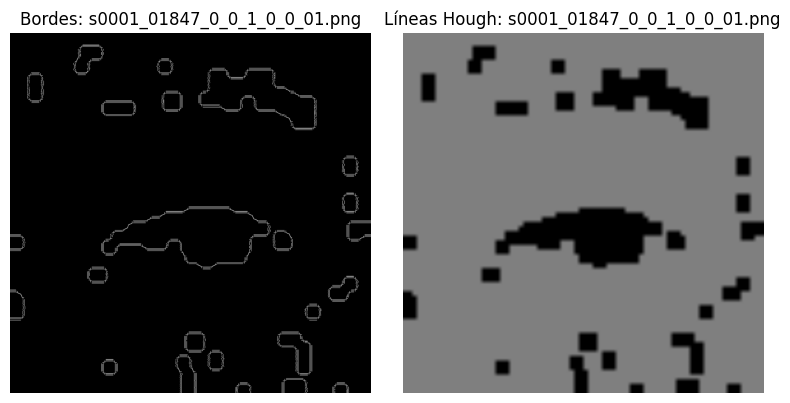

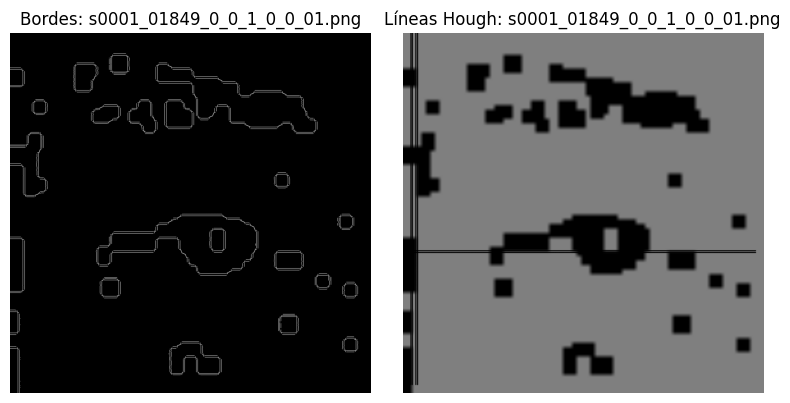

Resultados de líneas Hough guardados en la hoja 'hough_lines_awake' de 'stats.xlsx'


TypeError: Image data of dtype object cannot be converted to float

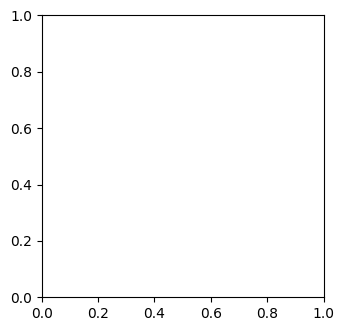

In [ ]:
ruta = "../images/awake/"
ruta_procesadas_sleepy = os.path.join(ruta, "../../processed_images/sleepy")
ruta_procesadas_awake = os.path.join(ruta, "../../processed_images/awake")

hough_data = []
max_visualizaciones = 3  # Solo mostrar resultados visuales de las primeras 3 imágenes
contador_vistas = 0

for nombre in sorted(os.listdir(ruta_procesadas_awake)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas_awake, nombre)
    image = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    # Bordes Canny
    edges = cv2.Canny(image, 50, 150, apertureSize=7)

    # Transformada de Hough
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)
    n_lines = 0
    params_list = []
    if lines is not None:
        n_lines = len(lines)
        for line in lines:
            rho, theta = line[0]
            params_list.append((rho, theta))
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Guardar número de líneas y sus parámetros básicos
    params_list_clean = [(float(rho), float(theta)) for (rho, theta) in params_list]
    hough_data.append({
        'imagen': nombre,
        'num_lineas': n_lines,
        'parametros': str(params_list_clean)
    })

    # Mostrar resultados visuales solo para las 3 primeras imágenes
    if contador_vistas < max_visualizaciones:
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(edges, cmap='gray')
        plt.title(f'Bordes: {nombre}')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR))
        plt.title(f'Líneas Hough: {nombre}')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        contador_vistas += 1

# Guardar en hoja "hough_lines_awake" de "stats.xlsx"
excel_path = "../results/stats.xlsx"
df = pd.DataFrame(hough_data)
with pd.ExcelWriter(excel_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="hough_lines_awake", index=False)

print("Resultados de líneas Hough guardados en la hoja 'hough_lines_awake' de 'stats.xlsx'")

hough_data2 = []
contador_vistas = 0

for nombre in sorted(os.listdir(ruta_procesadas_sleepy)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas_awake, nombre)
    image = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)
    image_color = image

    # Bordes Canny
    edges = cv2.Canny(image, 50, 150, apertureSize=7)

    # Transformada de Hough
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)
    n_lines = 0
    params_list = []
    if lines is not None:
        n_lines = len(lines)
        for line in lines:
            rho, theta = line[0]
            params_list.append((rho, theta))
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image_color, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Guardar número de líneas y sus parámetros básicos
    params_list_clean = [(float(rho), float(theta)) for (rho, theta) in params_list]
    hough_data.append({
        'imagen': nombre,
        'num_lineas': n_lines,
        'parametros': str(params_list_clean)
    })

    # Mostrar resultados visuales solo para las 3 primeras imágenes
    if contador_vistas < max_visualizaciones:
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(edges, cmap='gray')
        plt.title(f'Bordes: {nombre}')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
        plt.title(f'Líneas Hough: {nombre}')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        contador_vistas += 1

# Guardar en hoja "hough_lines_sleepy" de "stats.xlsx"
excel_path = "../results/stats.xlsx"
df = pd.DataFrame(hough_data)
with pd.ExcelWriter(excel_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="hough_lines_sleepy", index=False)

print("Resultados de líneas Hough guardados en la hoja 'hough_lines_sleepy' de 'stats.xlsx'")

## Circulos (Duración: ~15 minutos)

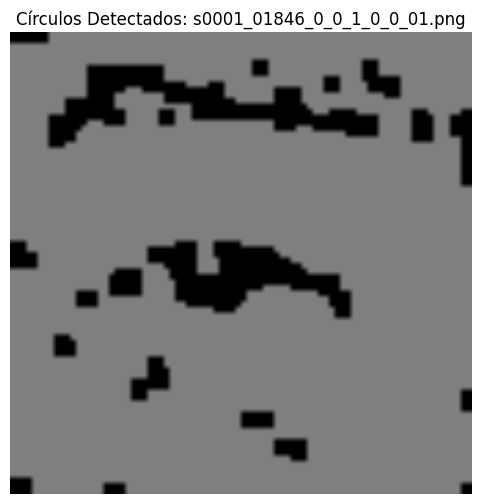

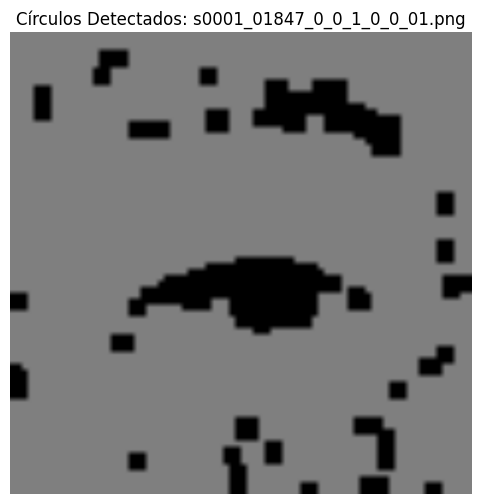

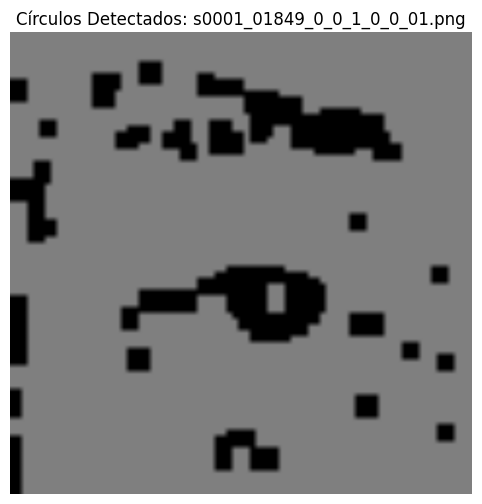


Imagen: s0001_02377_0_0_1_0_0_01.png
Círculos detectados (x, y, radio):
[[589 109  27]]

Imagen: s0012_07599_0_1_1_2_1_01.png
Círculos detectados (x, y, radio):
[[571 571  23]]

Imagen: s0014_06560_0_1_1_0_0_01.png
Círculos detectados (x, y, radio):
[[133 269  38]]

Imagen: s0014_07793_0_0_1_1_0_02.png
Círculos detectados (x, y, radio):
[[637 397  24]]

Imagen: s0015_01070_0_0_1_0_0_01.png
Círculos detectados (x, y, radio):
[[313 199  50]]

Imagen: s0019_06042_0_0_1_0_0_01.png
Círculos detectados (x, y, radio):
[[727 505  34]]

Imagen: s0031_00245_1_0_1_1_1_02.png
Círculos detectados (x, y, radio):
[[817 917  22]]

Imagen: s0031_00311_1_0_1_1_1_02.png
Círculos detectados (x, y, radio):
[[589 583  31]]

Imagen: s0032_03869_0_0_1_0_1_02.png
Círculos detectados (x, y, radio):
[[883 571  20]]

Imagen: s0032_04146_0_0_1_0_0_02.png
Círculos detectados (x, y, radio):
[[355  91  25]]

Imagen: s0035_00030_0_1_1_0_1_02.png
Círculos detectados (x, y, radio):
[[635 583  53]]

Imagen: s0035_00171_

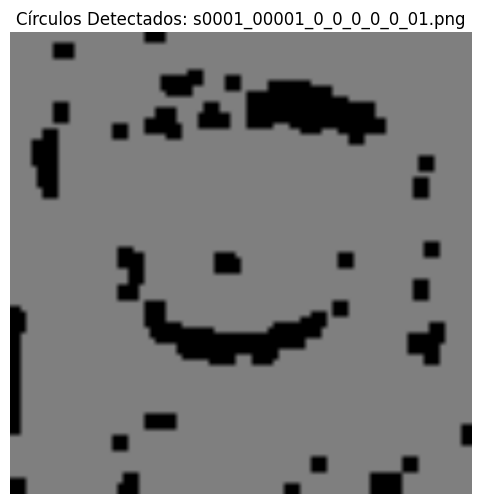

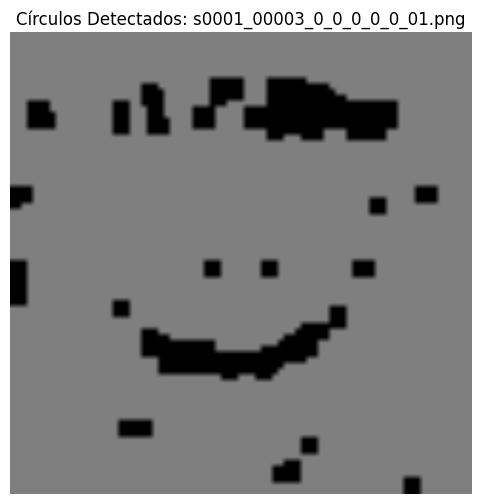

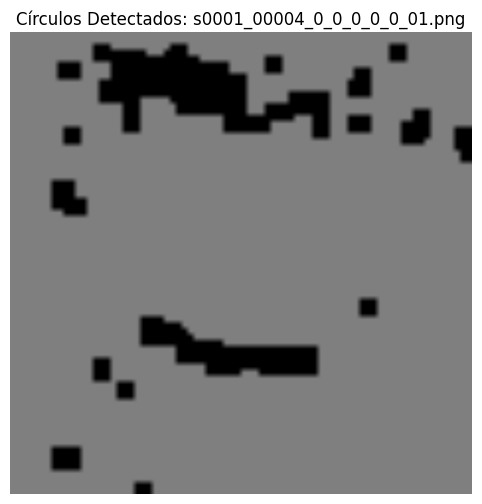

Resultados de círculos Hough guardados en la hoja 'hough_circles_sleepy' de 'stats.xlsx'


In [5]:
ruta = "../images/awake/"
ruta_procesadas_sleepy = os.path.join(ruta, "../../processed_images/sleepy")
ruta_procesadas_awake = os.path.join(ruta, "../../processed_images/awake")

circles_data = []
max_visualizaciones = 3   # Mostrar solo las primeras 3 imágenes
contador_vistas = 0

for nombre in sorted(os.listdir(ruta_procesadas_awake)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas_awake, nombre)
    image = cv2.imread(ruta_img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray, (9, 9), 2)

    circles = cv2.HoughCircles(
        gray_blur,
        cv2.HOUGH_GRADIENT,
        dp=1.2,
        minDist=40,
        param1=100,
        param2=30,
        minRadius=20,
        maxRadius=60
    )

    output = image.copy()
    num_circles = 0
    circles_str = ""
    if circles is not None:
        circles = np.uint16(np.around(circles))
        num_circles = circles.shape[1]
        # Serializar parámetros en formato legible "x,y,radio; x,y,radio; ..."
        circles_str = "; ".join([f"{x},{y},{r}" for (x, y, r) in circles[0, :]])
        for (x, y, r) in circles[0, :]:
            cv2.circle(output, (x, y), r, (0, 255, 0), 2)
            cv2.circle(output, (x, y), 2, (0, 0, 255), 3)

    # Mostrar solo para 3 primeras imágenes
    if contador_vistas < max_visualizaciones:
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
        plt.title(f"Círculos Detectados: {nombre}")
        plt.axis("off")
        plt.show()
        contador_vistas += 1

    circles_data.append({
        'imagen': nombre,
        'num_circulos': num_circles,
        'parametros': circles_str
    })

    if circles is not None:
        print(f"\nImagen: {nombre}")
        print("Círculos detectados (x, y, radio):")
        print(circles[0, :])

# Guardar en hoja "hough_circles_awake" del Excel
excel_path = "../results/stats.xlsx"
df = pd.DataFrame(circles_data)
with pd.ExcelWriter(excel_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="hough_circles_awake", index=False)

print("Resultados de círculos Hough guardados en la hoja 'hough_circles_awake' de 'stats.xlsx'")


circles_data2 = []
contador_vistas = 0

for nombre in sorted(os.listdir(ruta_procesadas_sleepy)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas_sleepy, nombre)
    image = cv2.imread(ruta_img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    circles = cv2.HoughCircles(
        gray_blur,
        cv2.HOUGH_GRADIENT,
        dp=1.2,
        minDist=40,
        param1=100,
        param2=30,
        minRadius=20,
        maxRadius=60
    )

    output = image.copy()
    num_circles = 0
    circles_str = ""
    if circles is not None:
        circles = np.uint16(np.around(circles))
        num_circles = circles.shape[1]
        # Serializar parámetros en formato legible "x,y,radio; x,y,radio; ..."
        circles_str = "; ".join([f"{x},{y},{r}" for (x, y, r) in circles[0, :]])
        for (x, y, r) in circles[0, :]:
            cv2.circle(output, (x, y), r, (0, 255, 0), 2)
            cv2.circle(output, (x, y), 2, (0, 0, 255), 3)

    # Mostrar solo para 3 primeras imágenes
    if contador_vistas < max_visualizaciones:
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
        plt.title(f"Círculos Detectados: {nombre}")
        plt.axis("off")
        plt.show()
        contador_vistas += 1

    circles_data2.append({
        'imagen': nombre,
        'num_circulos': num_circles,
        'parametros': circles_str
    })

    if circles is not None:
        print(f"\nImagen: {nombre}")
        print("Círculos detectados (x, y, radio):")
        print(circles[0, :])

# Guardar en hoja "hough_circles_sleepy" del Excel
excel_path = "../results/stats.xlsx"
df = pd.DataFrame(circles_data2)
with pd.ExcelWriter(excel_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="hough_circles_sleepy", index=False)

print("Resultados de círculos Hough guardados en la hoja 'hough_circles_sleepy' de 'stats.xlsx'")

# SIFT para awake y sleepy (Duración: ~10 min)

In [ ]:
ruta = "../images/awake/"
ruta_procesadas_sleepy = os.path.join(ruta, "../../processed_images/sleepy")
ruta_procesadas_awake = os.path.join(ruta, "../../processed_images/awake")

sift_data = []

for nombre in sorted(os.listdir(ruta_procesadas_awake)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas_awake, nombre)
    image = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    # Inicializar SIFT
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)

    # Serializar descriptores para Excel
    descriptors_str = ""
    if descriptors is not None and len(descriptors) > 0:
        descriptors_str = "; ".join([" ".join([str(f) for f in row]) for row in descriptors])

    sift_data.append({
        'imagen': nombre,
        'num_keypoints': len(keypoints),
        'descriptores': descriptors_str
    })

# Guardar en hoja "SIFT" de estadisticas.xlsx
excel_path = "../results/stats.xlsx"
df = pd.DataFrame(sift_data)
with pd.ExcelWriter(excel_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="SIFT_awake", index=False)

print("Datos SIFT guardados en la hoja 'SIFT_awake' de 'stats.xlsx'")

sift_data2 = []

for nombre in sorted(os.listdir(ruta_procesadas_sleepy)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas_sleepy, nombre)
    image = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    # Inicializar SIFT
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)

    # Serializar descriptores para Excel
    descriptors_str = ""
    if descriptors is not None and len(descriptors) > 0:
        descriptors_str = "; ".join([" ".join([str(f) for f in row]) for row in descriptors])

    sift_data2.append({
        'imagen': nombre,
        'num_keypoints': len(keypoints),
        'descriptores': descriptors_str
    })

# Guardar en hoja "SIFT" de estadisticas.xlsx
excel_path = "../results/stats.xlsx"
df = pd.DataFrame(sift_data2)
with pd.ExcelWriter(excel_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="SIFT_sleepy", index=False)

print("Datos SIFT guardados en la hoja 'SIFT_sleepy' de 'stats.xlsx'")

# ORB para awake y sleepy (Duración: ~10 minutos)

In [ ]:
ruta = "../images/awake/"
ruta_procesadas_sleepy = os.path.join(ruta, "../../processed_images/sleepy")
ruta_procesadas_awake = os.path.join(ruta, "../../processed_images/awake")

orb_data = []

for nombre in sorted(os.listdir(ruta_procesadas_awake)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas_awake, nombre)
    image = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    # Inicializa ORB
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(image, None)

    # Serializar descriptores para Excel
    descriptors_str = ""
    if descriptors is not None and len(descriptors) > 0:
        descriptors_str = "; ".join([" ".join([str(f) for f in row]) for row in descriptors])

    orb_data.append({
        'imagen': nombre,
        'num_keypoints': len(keypoints),
        'descriptores': descriptors_str
    })

# Guardar en hoja "ORB_awake" de stats.xlsx
excel_path = "../results/stats.xlsx"
df = pd.DataFrame(orb_data)
with pd.ExcelWriter(excel_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="ORB_awake", index=False)

print("Datos ORB guardados en la hoja 'ORB_awake' de 'stats.xlsx'")

orb_data2 = []

for nombre in sorted(os.listdir(ruta_procesadas_sleepy)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas_sleepy, nombre)
    image = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    # Inicializa ORB
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(image, None)

    # Serializar descriptores para Excel
    descriptors_str = ""
    if descriptors is not None and len(descriptors) > 0:
        descriptors_str = "; ".join([" ".join([str(f) for f in row]) for row in descriptors])

    orb_data2.append({
        'imagen': nombre,
        'num_keypoints': len(keypoints),
        'descriptores': descriptors_str
    })

# Guardar en hoja "ORB_sleepy" de stats.xlsx
excel_path = "../results/stats.xlsx"
df = pd.DataFrame(orb_data2)
with pd.ExcelWriter(excel_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="ORB_sleepy", index=False)

print("Datos ORB guardados en la hoja 'ORB_sleepy' de 'stats.xlsx'")